In [64]:
import pandas as pd
import statsmodels.formula.api as smf 
import statsmodels.api as sm
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [65]:
train[:1]

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663


In [71]:
!conda install -c "conda-forge/label/cf202003" fbprophet -y




Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - fbprophet

Current channels:

  - https://conda.anaconda.org/conda-forge/label/cf202003/osx-arm64
  - https://conda.anaconda.org/conda-forge/label/cf202003/noarch
  - https://conda.anaconda.org/conda-forge/osx-arm64
  - https://conda.anaconda.org/conda-forge/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [66]:
from fbprophet import Prophet


ModuleNotFoundError: No module named 'fbprophet'

<AxesSubplot:xlabel='date', ylabel='num_sold'>

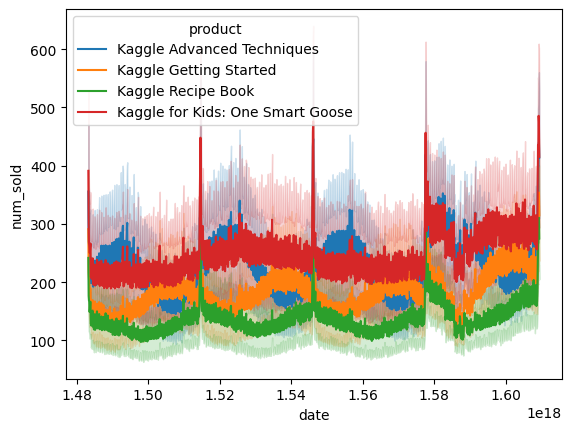

In [61]:
import seaborn as sns
sns.lineplot(train, x='date', y='num_sold', hue='product')

In [23]:
mu = train['num_sold'].mean()
var = train['num_sold'].var()
print(var,mu, 'Var > mu, overdispersed. Will try with Gamma.')

16102.055152548053 194.29698551220625 Var > mu, overdispersed. Will try with Gamma.


In [34]:
train['date'] = pd.to_datetime(train['date']).astype('int')
test['date'] = pd.to_datetime(test['date']).astype('int')

In [8]:
expr = 'num_sold ~ country + store + product'
gamma = smf.glm(formula=expr,
                      data=train,
                      # offset=train['date'],
                      family=sm.families.Gamma(link=sm.families.links.log())
                  ).fit()
gamma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               num_sold   No. Observations:                70128
Model:                            GLM   Df Residuals:                    70118
Model Family:                   Gamma   Df Model:                            9
Link Function:                    log   Scale:                        0.087697
Method:                          IRLS   Log-Likelihood:            -3.6246e+05
Date:                Wed, 14 Sep 2022   Deviance:                       5097.5
Time:                        22:02:32   Pearson chi2:                 6.15e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.9863
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                       6.0070      0.004   1698.686      0.000       6.000       6.014
country[T.France]                              -0.1024      0.004    -26.426      0.000      -0.110      -0.095
country[T.Germany]                              0.0017      0.004      0.441      0.660      -0.006       0.009
country[T.Italy]                               -0.2349      0.004    -60.645      0.000      -0.243      -0.227
country[T.Poland]                              -0.7306      0.004   -188.600      0.000      -0.738      -0.723
country[T.Spain]                               -0.3289      0.004    -84.896      0.000      -0.336      -0.321
store[T.KaggleRama]                            -1.0595      0.002   -473.710      0.000      -1.064      -1.055
product[T.Kaggle Getting Started]              -0.2213      0.003    -69.961      0.000      -0.227      -0.215
product[T.Kaggle Recipe Book]                  -0.5106      0.003   -161.444      0.000      -0.517      -0.504
product[T.Kaggle for Kids: One Smart Goose]     0.0772      0.003     24.422      0.000       0.071       0.083
===============================================================================================================
"""

In [9]:
test['num_sold'] = gamma.predict(transform=True, exog=test)

In [10]:
test.set_index('row_id')['num_sold'].to_csv('preds.csv')

Scores 25

# Lightgbm

In [25]:
train['country'] = train['country'].astype('category')
train['product'] = train['product'].astype('category')
train['store'] = train['store'].astype('category')
test['country'] = test['country'].astype('category')
test['product'] = test['product'].astype('category')
test['store'] = test['store'].astype('category')
train.set_index('row_id',drop=True,inplace=True)
test.set_index('row_id',drop=True,inplace=True)

In [46]:
X = train.drop(columns=['num_sold','date'])

In [48]:
import lightgbm as lgb
m = lgb.LGBMRegressor()
m.fit(X, train['num_sold'])

LGBMRegressor()

In [49]:
X

,country,store,product
row_id,,,
0,Belgium,KaggleMart,Kaggle Advanced Techniques
1,Belgium,KaggleMart,Kaggle Getting Started
2,Belgium,KaggleMart,Kaggle Recipe Book
3,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose
4,Belgium,KaggleRama,Kaggle Advanced Techniques
...,...,...,...
70123,Spain,KaggleMart,Kaggle for Kids: One Smart Goose
70124,Spain,KaggleRama,Kaggle Advanced Techniques
70125,Spain,KaggleRama,Kaggle Getting Started


In [50]:
test.drop(column)

,date,country,store,product,num_sold
row_id,,,,,
70128,1609459200000000000,Belgium,KaggleMart,Kaggle Advanced Techniques,619.896779
70129,1609459200000000000,Belgium,KaggleMart,Kaggle Getting Started,457.932610
70130,1609459200000000000,Belgium,KaggleMart,Kaggle Recipe Book,416.976294
70131,1609459200000000000,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,649.849610
70132,1609459200000000000,Belgium,KaggleRama,Kaggle Advanced Techniques,205.867995
...,...,...,...,...,...
87643,1640908800000000000,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,659.620627
87644,1640908800000000000,Spain,KaggleRama,Kaggle Advanced Techniques,220.131581
87645,1640908800000000000,Spain,KaggleRama,Kaggle Getting Started,183.856729


In [52]:
preds = m.predict(test.drop(columns=['date', 'num_sold']))
test['num_sold'] = preds

In [53]:
test

,date,country,store,product,num_sold
row_id,,,,,
70128,1609459200000000000,Belgium,KaggleMart,Kaggle Advanced Techniques,405.890651
70129,1609459200000000000,Belgium,KaggleMart,Kaggle Getting Started,325.646067
70130,1609459200000000000,Belgium,KaggleMart,Kaggle Recipe Book,243.921248
70131,1609459200000000000,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,437.309157
70132,1609459200000000000,Belgium,KaggleRama,Kaggle Advanced Techniques,140.885615
...,...,...,...,...,...
87643,1640908800000000000,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,315.417933
87644,1640908800000000000,Spain,KaggleRama,Kaggle Advanced Techniques,101.332191
87645,1640908800000000000,Spain,KaggleRama,Kaggle Getting Started,81.140819


In [54]:
test['num_sold'].to_csv('preds.csv')